In [8]:
import torch
import torch.nn

import numpy as np
import nltk
from nltk.tokenize import word_tokenize

# from tokenization import Word_Preprocess

import numpy as np
from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### SkipGram and CBOW
***
- There are many ways for a word embedding to learn from context.
- Currently the two main way of embedding words is SkipGram and CBOW
- In this Notebook, we are going to explain what Skipgram and CBOW are and how they embed words

#### 1. CBOW
***
- CBOW (Continuous Bag of Words), is a word embedding technique that predicts the probability of a word given the surrounding words

1. Process of CBOW
    - Each word is coded in a one-hot-encoded form
    - Implmentation of Sliding window of context words where the subset of words is split into focus words and context words
    - Out of the "bag of words", we beed to have the highest probability that it chooses the Focus Word
   <br>
    <img src=attachment:8dbfd9ed-f27f-4de2-a7bb-7c21f7d96309.png width=400>
    
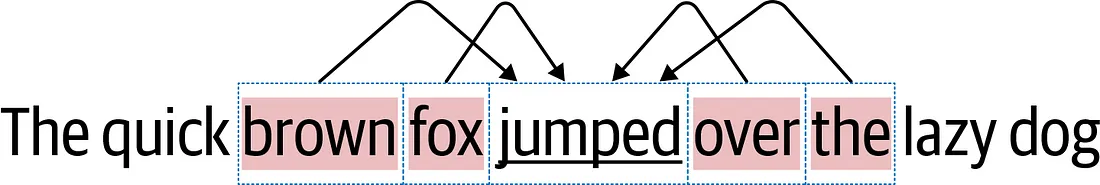

In [9]:
data = ["The earth is orbiting around the sun", "Astrology and astronomy are two different related science"]
example_sentence = data[0]
# Should Return
"""
The : Earth is
earth: the is orbiting
is: the earth orbiting around
orbiting: earth is around the

"""

def vocab(data):
    vocab = set()
    for sentence in data:
        vocab.update(set(word_tokenize(sentence)))

    return {list(vocab)[i]: i for i in range(len(vocab))}

def CBOW(data, n):
    
        tokenized_words = word_tokenize(sentence)
    return {word : tokenized_words[max(0, i-n): i] + tokenized_words[i + 1: i + n + 1] for i, word in enumerate(tokenized_words)}

In [10]:
for sentence in data:
    CBOW(sentence, 2)

In [73]:
vocab(data)

{'related': 0,
 'are': 1,
 'and': 2,
 'earth': 3,
 'orbiting': 4,
 'sun': 5,
 'is': 6,
 'astronomy': 7,
 'The': 8,
 'science': 9,
 'the': 10,
 'different': 11,
 'two': 12,
 'Astrology': 13,
 'around': 14}

#### 2. Skip-Gram
***
- Skip-Gram, is a word embedding technique that predicts the probability of the surrounding words by a single targte value 

1. Process of Skip-Gram
    - Each word is coded in a one-hot-encoded form
    - Implmentation of Sliding window of context words where the subset of words is split into focus words and context words
    - Out of the "bag of words", we beed to have the highest probability that it chooses the Focus Word
   <br>
   
    <img src=attachment:39373305-d2cd-4b5d-8dfc-f7a544d35953.png width=400>
    
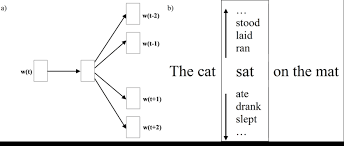